# EDA
----
This notebook provides a rough overview of the code for the exploratory data analysis. The code in its current form is a bit scrappy as it was changed 'on-the-go'.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('banking_churn_data/train.csv')

#train['date'] = pd.to_datetime(train['date']).dt.to_period('m')
#train['dob'] = pd.to_datetime(train['dob']).dt.to_period('m')
#train['creation_date'] = pd.to_datetime(train['creation_date']).dt.to_period('m')
#train['months_w_bank'] = (train['date'].astype(int) - train['creation_date'].astype(int))
#train['age'] = round((train['date'].astype(int) - train['dob'].astype(int))/12, 2)

In [11]:
train.isnull().sum(axis=0)
train=train[~train.state.isnull()].reset_index(drop=True)

In [12]:
train.columns

Index(['index', 'date', 'customer_id', 'amount', 'deposit', 'withdrawal',
       'is_deposit', 'is_withdraw', 'dob', 'state', 'start_balance',
       'creation_date', 'creation_month', 'month_start', 'month_end', 'churn',
       'date_month_x', 'creation_date_month', 'months_w_bank', 'age',
       'amount_agg', 'is_depo_roll', 'is_wdraw_roll', 'State Code', 'Region',
       'Division', 'unemployment_rate', 'GDP', 'date_month_y',
       'real_interest_rate', 'DATE', 'UMCSENT'],
      dtype='object')

In [13]:
train.head()

index        date  customer_id   amount  deposit  withdrawal  is_deposit  \
0      0  2007-01-31           91 -2260.92  3034.26    -5295.18           1   
1      1  2007-02-28           91     0.00     0.00        0.00           0   
2      2  2007-03-31           91     0.00     0.00        0.00           0   
3      3  2007-01-31           92     0.00     0.00        0.00           0   
4      4  2007-02-28           92  1164.90  1164.90        0.00           1   

   is_withdraw      dob       state  ...  is_wdraw_roll State Code     Region  \
0            1  1993-07  California  ...            1.0         CA       West   
1            0  1993-07  California  ...            1.0         CA       West   
2            0  1993-07  California  ...            1.0         CA       West   
3            0  1985-12    New York  ...            1.0         NY  Northeast   
4            0  1985-12    New York  ...            1.0         NY  Northeast   

          Division  unemployment_rate        GDP date_month_y  \
0          Pacific                4.9  14208.569      2007-01   
1          Pacific                4.9  14208.569      2007-02   
2          Pacific                4.9  14382.363      2007-03   
3  Middle Atlantic                4.2  14208.569      2007-01   
4  Middle Atlantic                4.2  14208.569      2007-02   

  real_interest_rate        DATE  UMCSENT  
0           4.723892  2007-01-31     91.3  
1           4.346205  2007-02-28     88.4  
2           4.600050  2007-03-31     87.1  
3           4.723892  2007-01-31     91.3  
4           4.346205  2007-02-28     88.4  

[5 rows x 32 columns]

# Target Analysis
We analyse the target variable - churn - through time and as a whole.

Below we see that the target is imbalanced.

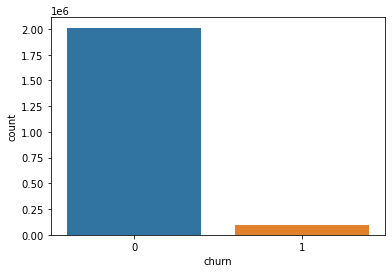

In [14]:
fig, ax = plt.subplots()
sns.countplot(data=train, x='churn', ax=ax);

Text(0.5, 0.98, 'Churn rate through time')

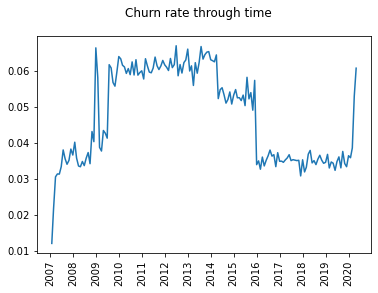

In [15]:
import matplotlib.dates as mdates
train['date'] = pd.to_datetime(train['date'])
train['date'] = train['date'].dt.date
fig, ax = plt.subplots()
#plot of churn rate through time.
ax.plot(train.groupby('date').churn.sum()/train.groupby('date').churn.count())
ax.xaxis.set_major_locator(mdates.YearLocator())   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
ax.xaxis.set_tick_params(rotation=90)
fig.suptitle('Churn rate through time')

# Feature analysis

Text(0.5, 1.0, 'Portfolio value through time')

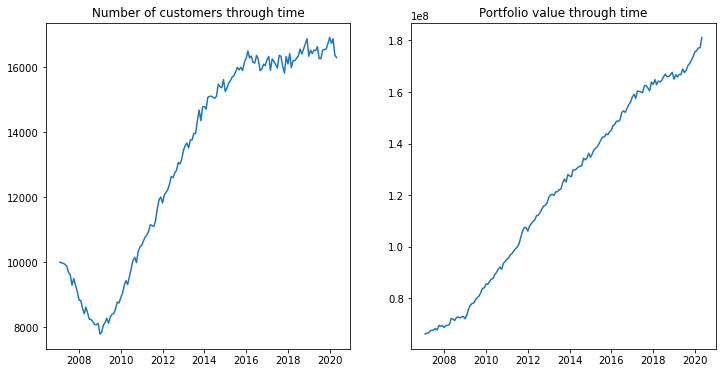

In [16]:
# number of customers through time
# portfolio value through time
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(train.groupby('date')['customer_id'].nunique())
ax[0].set_title('Number of customers through time')
ax[1].plot(train.groupby('date')['month_end'].sum())
ax[1].set_title('Portfolio value through time')

Text(0.5, 1.0, 'Average starting balance through time')

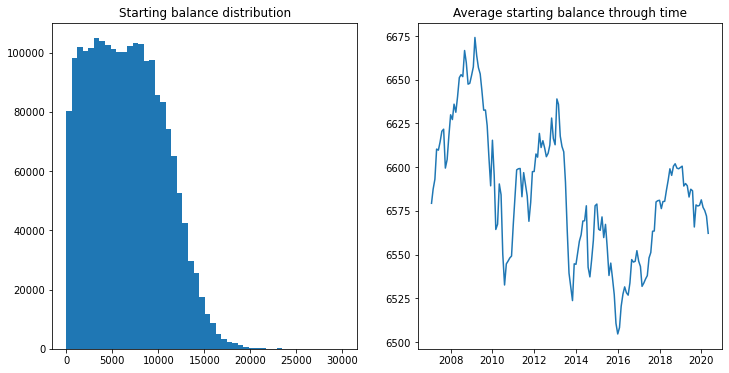

In [17]:
#starting balance - distribution and average through time
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].hist(train.start_balance, bins=50);
ax[0].set_title('Starting balance distribution')
ax[1].plot(train.groupby('date')['start_balance'].mean())
ax[1].set_title('Average starting balance through time')

In [18]:
# age distribution
# average age through time

Text(0.5, 1.0, 'Value of withdrawals/deposits')

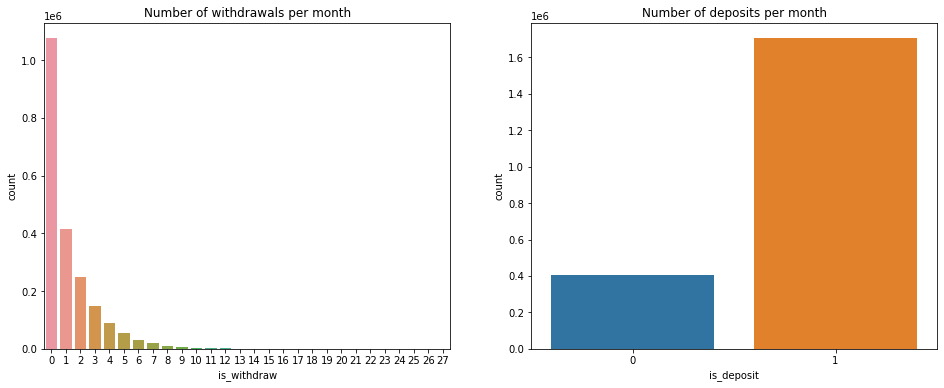

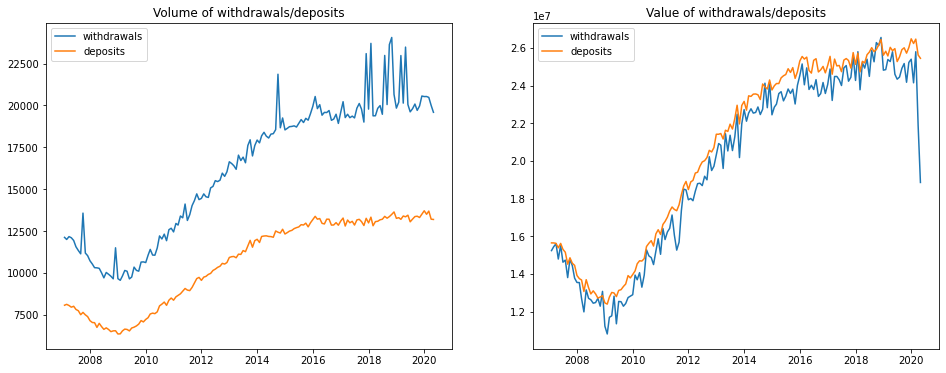

In [19]:
# withdrawal and deposit countplots
# number of withdrawals and deposits through time
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.countplot(data=train, x='is_withdraw', ax=ax[0]) #is_deposit	is_withdraw
sns.countplot(data=train, x='is_deposit', ax = ax[1])
ax[0].set_title('Number of withdrawals per month')
ax[1].set_title('Number of deposits per month')

fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].plot(train.groupby('date')['is_withdraw'].sum(), label='withdrawals')
ax[0].plot(train.groupby('date')['is_deposit'].sum(), label='deposits')
ax[0].legend(loc='best')
ax[0].set_title('Volume of withdrawals/deposits')

ax[1].plot(train.groupby('date')['withdrawal'].sum()*-1, label='withdrawals')
ax[1].plot(train.groupby('date')['deposit'].sum(), label='deposits')
ax[1].legend(loc='best')
ax[1].set_title('Value of withdrawals/deposits')

Text(0.5, 1.0, 'Number of 3 month rolled deposits per month')

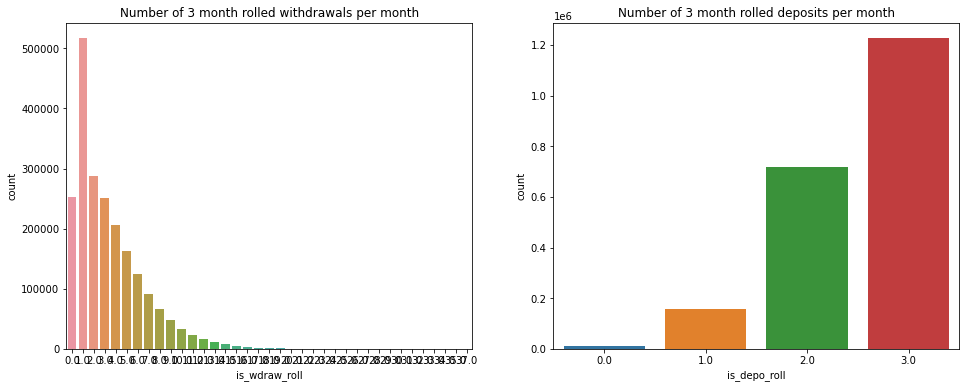

In [20]:
#number of deposits and withdraws rolled
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.countplot(data=train, x='is_wdraw_roll', ax=ax[0]) #is_deposit	is_withdraw
sns.countplot(data=train, x='is_depo_roll', ax = ax[1])
ax[0].set_title('Number of 3 month rolled withdrawals per month')
ax[1].set_title('Number of 3 month rolled deposits per month')


In [21]:
train.columns

Index(['index', 'date', 'customer_id', 'amount', 'deposit', 'withdrawal',
       'is_deposit', 'is_withdraw', 'dob', 'state', 'start_balance',
       'creation_date', 'creation_month', 'month_start', 'month_end', 'churn',
       'date_month_x', 'creation_date_month', 'months_w_bank', 'age',
       'amount_agg', 'is_depo_roll', 'is_wdraw_roll', 'State Code', 'Region',
       'Division', 'unemployment_rate', 'GDP', 'date_month_y',
       'real_interest_rate', 'DATE', 'UMCSENT'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of deposit amounts')

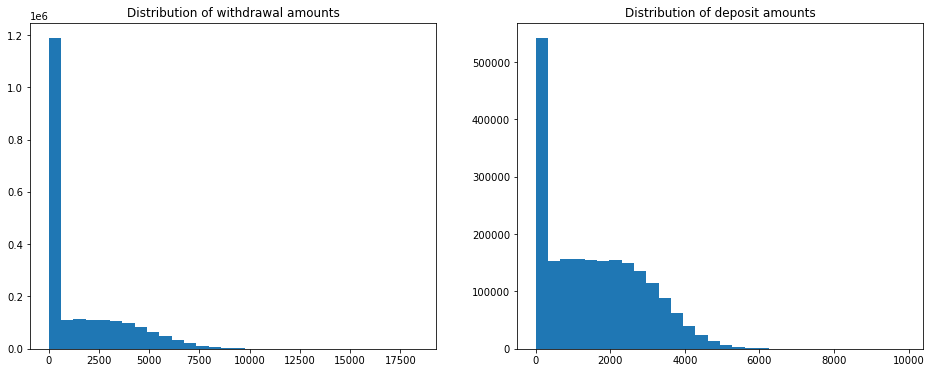

In [22]:
# withdrawal and deposit distributions (amount)

fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].hist(train['withdrawal']*-1, bins=30)
ax[0].set_title('Distribution of withdrawal amounts')
ax[1].hist(train['deposit'], bins=30);
ax[1].set_title('Distribution of deposit amounts')

#avg withdrawal and deposit through time

Text(0.5, 1.0, 'Distribution of rolled withdrawal amounts')

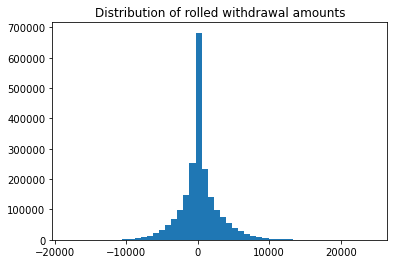

In [23]:
#amount rolled
#todo
fig, ax = plt.subplots()
ax.hist(train['amount_agg'], bins=50)
ax.set_title('Distribution of rolled withdrawal amounts')

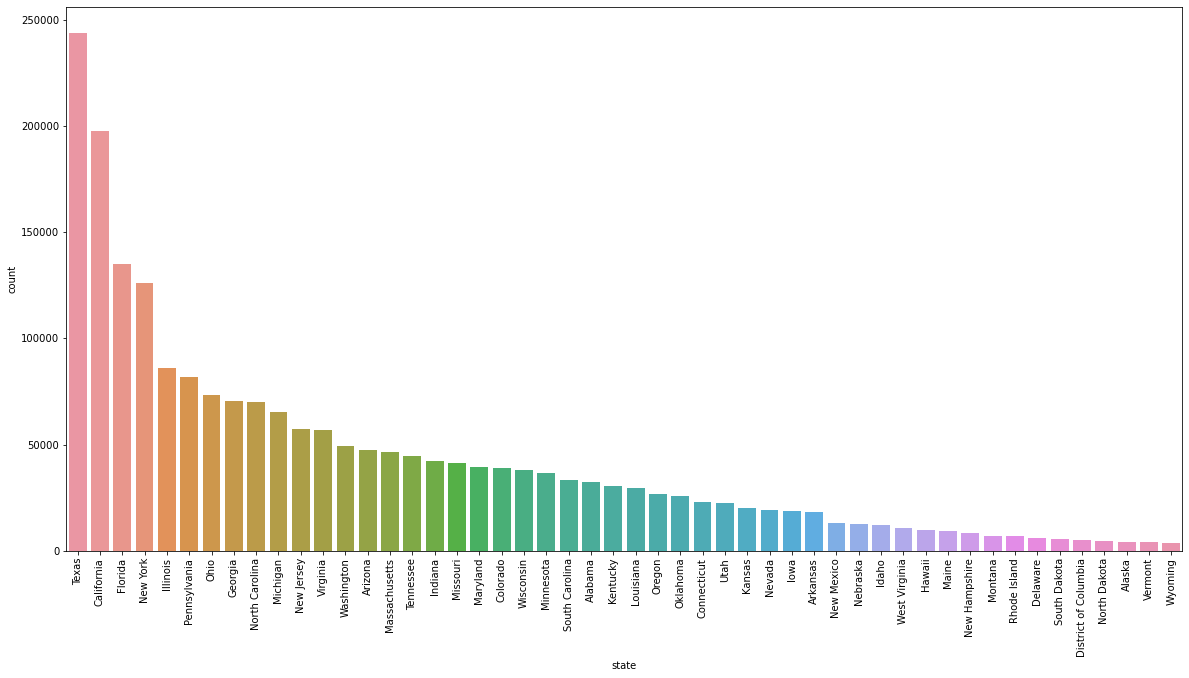

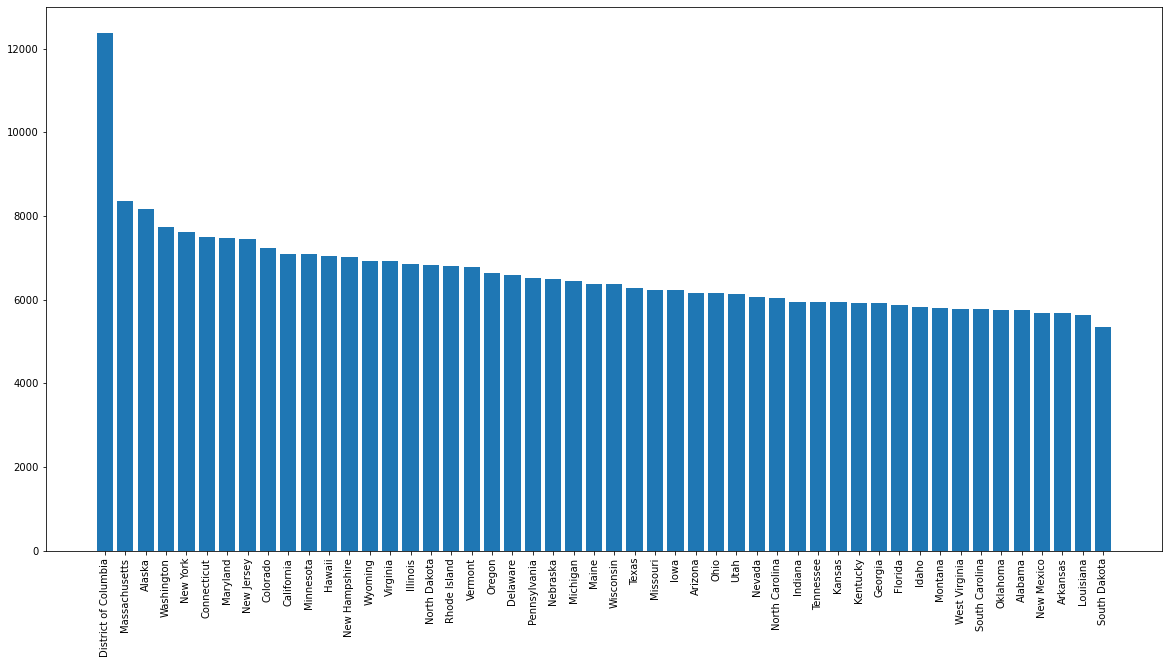

In [24]:
#states
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data = train, x = 'state', ax=ax, order = train['state'].value_counts().index)
ax.xaxis.set_tick_params(rotation=90)
#average account balance per state
train.groupby('state')['start_balance'].mean().index
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(train.groupby('state')['start_balance'].mean().sort_values(ascending=False).index, train.groupby('state')['start_balance'].mean().sort_values(ascending=False))
ax.xaxis.set_tick_params(rotation=90)

#Withdrawal and deposits by state

Text(0.5, 1.0, 'Months with bank')

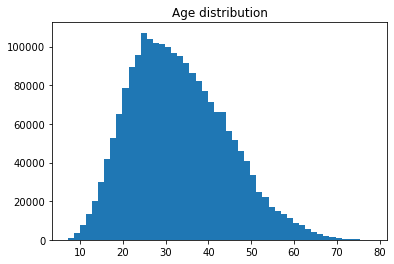

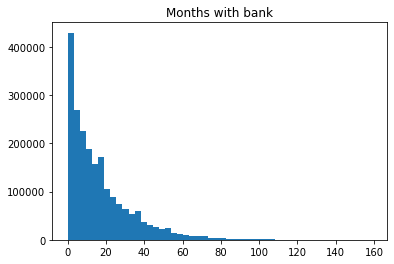

In [25]:
# age dist

train['date_month'] = pd.to_datetime(train['date']).dt.to_period('m')
train['dob'] = pd.to_datetime(train['dob']).dt.to_period('m')
train['creation_date_month'] = pd.to_datetime(train['creation_date']).dt.to_period('m')
train['months_w_bank'] = (train['date_month'].astype(int) - train['creation_date_month'].astype(int))#
train['age'] = round((train['date_month'].astype(int) - train['dob'].astype(int))/12, 2)

fig, ax = plt.subplots()
ax.hist(train['age'],bins=50) # note this contains same customer multiple times
ax.set_title('Age distribution')

fig, ax = plt.subplots()
ax.hist(train['months_w_bank'], bins=50) # contains customers multiple times (observations)
ax.set_title('Months with bank')

#balance by age bin

#withdrawal by age 

# Features vs Target

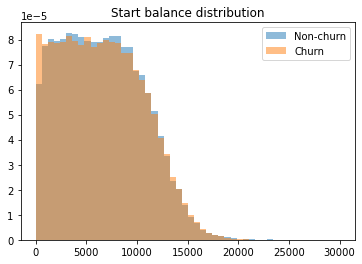

In [26]:
#can starting balance influence churn?
fig, ax = plt.subplots()
ax.hist(train[train['churn']==0]['start_balance'],bins=50, density=True, alpha=0.5, label='Non-churn') # note this contains same customer multiple times
ax.hist(train[train['churn']==1]['start_balance'], bins=50, density=True, alpha=0.5, label='Churn')
ax.set_title('Start balance distribution')
ax.legend(loc='best')

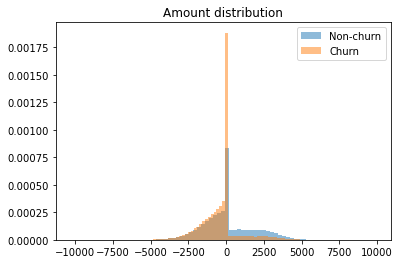

In [27]:
#can amount, deposit and withdrawal effect churn? - note: churn is churn the following month
fig, ax = plt.subplots()
ax.hist(train[train['churn']==0]['amount'],bins=75, density=True, alpha=0.5, label='Non-churn') # note this contains same customer multiple times
ax.hist(train[train['churn']==1]['amount'], bins=75, density=True, alpha=0.5, label='Churn')
ax.set_title('Amount distribution')
ax.legend(loc='best')
#amount, deposit and withdrawal frequency

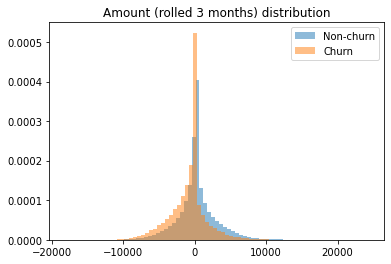

In [28]:
#amount rolled vs churn
fig, ax = plt.subplots()
ax.hist(train[train['churn']==0]['amount_agg'],bins=75, density=True, alpha=0.5, label='Non-churn') # note this contains same customer multiple times
ax.hist(train[train['churn']==1]['amount_agg'], bins=75, density=True, alpha=0.5, label='Churn')
ax.set_title('Amount (rolled 3 months) distribution')
ax.legend(loc='best')

In [29]:
train.columns

Index(['index', 'date', 'customer_id', 'amount', 'deposit', 'withdrawal',
       'is_deposit', 'is_withdraw', 'dob', 'state', 'start_balance',
       'creation_date', 'creation_month', 'month_start', 'month_end', 'churn',
       'date_month_x', 'creation_date_month', 'months_w_bank', 'age',
       'amount_agg', 'is_depo_roll', 'is_wdraw_roll', 'State Code', 'Region',
       'Division', 'unemployment_rate', 'GDP', 'date_month_y',
       'real_interest_rate', 'DATE', 'UMCSENT', 'date_month'],
      dtype='object')

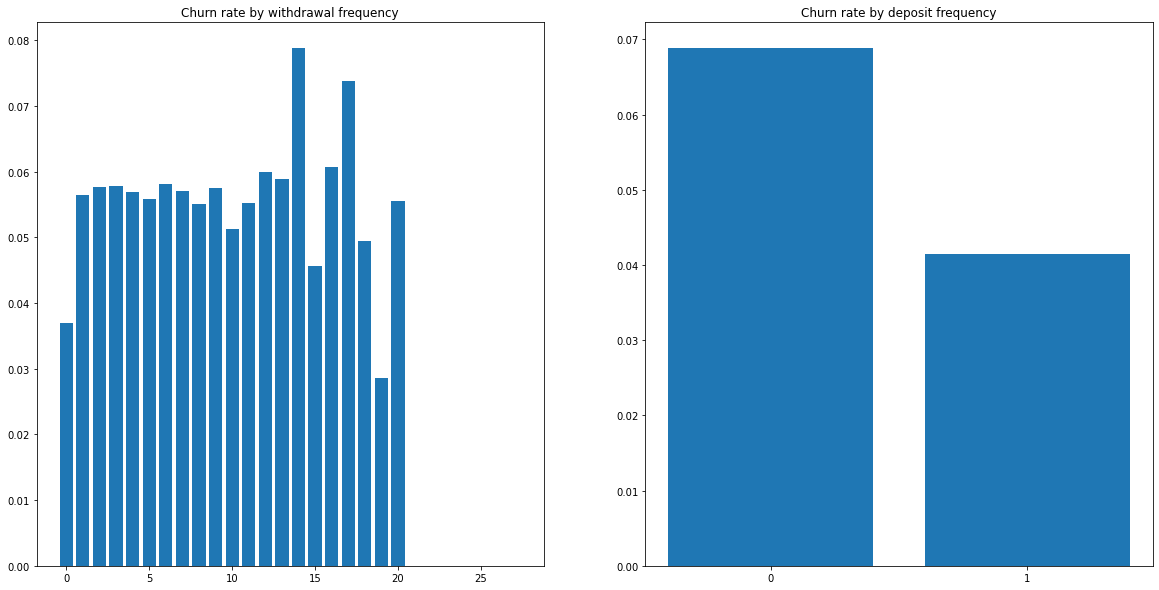

In [30]:
#number of withdrawals vs churn
fig, ax = plt.subplots(1,2, figsize=(20,10))
churn_withdraw = (train.groupby('is_withdraw')['churn'].sum()/train.groupby('is_withdraw')['churn'].count())
churn_deposit = (train.groupby('is_deposit')['churn'].sum()/train.groupby('is_deposit')['churn'].count())
ax[0].bar(churn_withdraw.index, churn_withdraw)
ax[0].set_title('Churn rate by withdrawal frequency')
ax[1].bar(churn_deposit.index, churn_deposit)
ax[1].set_title('Churn rate by deposit frequency')
ax[1].set_xticks([0,1])

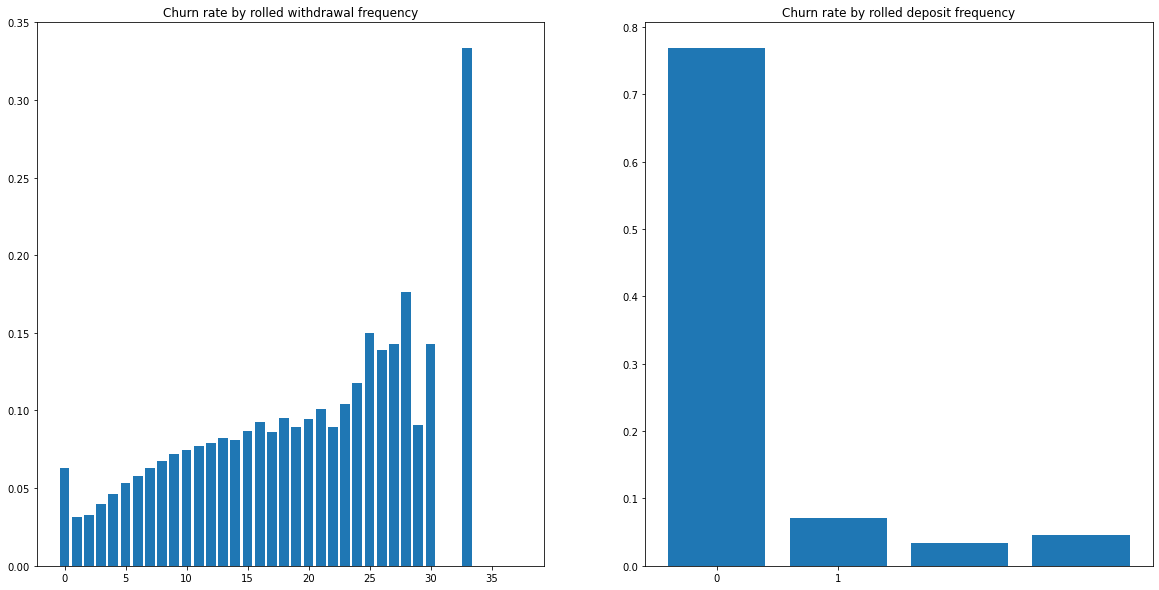

In [31]:
#rolled number of withdrawals/deposits vs churn
fig, ax = plt.subplots(1,2, figsize=(20,10))
churn_withdraw = (train.groupby('is_wdraw_roll')['churn'].sum()/train.groupby('is_wdraw_roll')['churn'].count())
churn_deposit = (train.groupby('is_depo_roll')['churn'].sum()/train.groupby('is_depo_roll')['churn'].count())
ax[0].bar(churn_withdraw.index, churn_withdraw)
ax[0].set_title('Churn rate by rolled withdrawal frequency')
ax[1].bar(churn_deposit.index, churn_deposit)
ax[1].set_title('Churn rate by rolled deposit frequency')
ax[1].set_xticks([0,1])

In [32]:
train.columns

Index(['index', 'date', 'customer_id', 'amount', 'deposit', 'withdrawal',
       'is_deposit', 'is_withdraw', 'dob', 'state', 'start_balance',
       'creation_date', 'creation_month', 'month_start', 'month_end', 'churn',
       'date_month_x', 'creation_date_month', 'months_w_bank', 'age',
       'amount_agg', 'is_depo_roll', 'is_wdraw_roll', 'State Code', 'Region',
       'Division', 'unemployment_rate', 'GDP', 'date_month_y',
       'real_interest_rate', 'DATE', 'UMCSENT', 'date_month'],
      dtype='object')

In [33]:
#rolled withdrawals and deposits vs churn

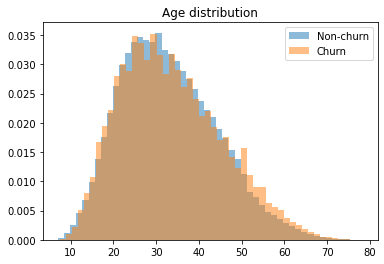

In [34]:
#age vs churn
fig, ax = plt.subplots()
ax.hist(train[train['churn']==0]['age'],bins=50, density=True, alpha=0.5, label='Non-churn') # note this contains same customer multiple times
ax.hist(train[train['churn']==1]['age'], bins=50, density=True, alpha=0.5, label='Churn')
ax.set_title('Age distribution')
ax.legend(loc='best')

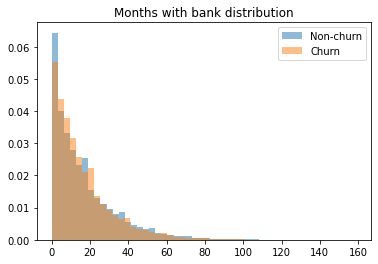

In [35]:
#months with bank vs churn
fig, ax = plt.subplots()
ax.hist(train[train['churn']==0]['months_w_bank'],bins=50, density=True, alpha=0.5, label='Non-churn') # note this contains same customer multiple times
ax.hist(train[train['churn']==1]['months_w_bank'], bins=50, density=True, alpha=0.5, label='Churn')
ax.set_title('Months with bank distribution')
ax.legend(loc='best')

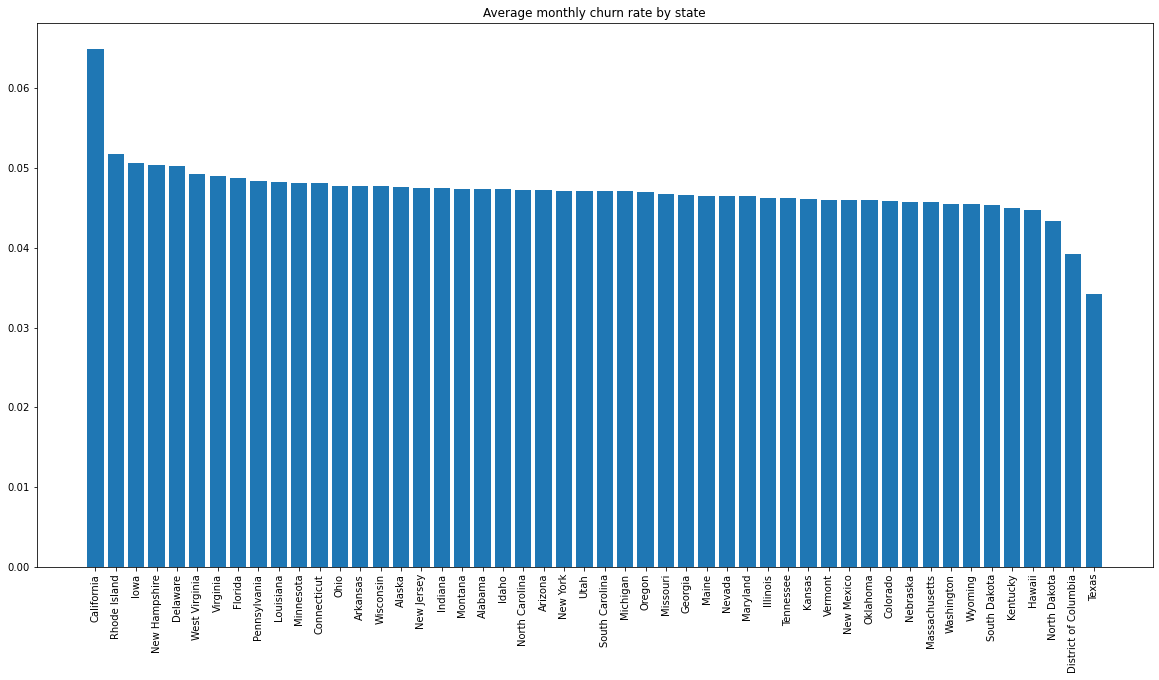

In [36]:
#state vs churn (churn rate by state)
fig, ax = plt.subplots(figsize=(20,10))
state_avg_churn = (train.groupby(['state','date']).churn.sum()/train.groupby(['state','date']).churn.count()).groupby('state').mean().sort_values(ascending=False)
ax.bar(state_avg_churn.index, state_avg_churn)
ax.set_title('Average monthly churn rate by state') #maybe need to groupby customer_id too? - but they all churn at some point
ax.xaxis.set_tick_params(rotation=90)

In [37]:
train.head()

index        date  customer_id   amount  deposit  withdrawal  is_deposit  \
0      0  2007-01-31           91 -2260.92  3034.26    -5295.18           1   
1      1  2007-02-28           91     0.00     0.00        0.00           0   
2      2  2007-03-31           91     0.00     0.00        0.00           0   
3      3  2007-01-31           92     0.00     0.00        0.00           0   
4      4  2007-02-28           92  1164.90  1164.90        0.00           1   

   is_withdraw      dob       state  ...  State Code     Region  \
0            1  1993-07  California  ...          CA       West   
1            0  1993-07  California  ...          CA       West   
2            0  1993-07  California  ...          CA       West   
3            0  1985-12    New York  ...          NY  Northeast   
4            0  1985-12    New York  ...          NY  Northeast   

          Division  unemployment_rate        GDP  date_month_y  \
0          Pacific                4.9  14208.569       2007-01   
1          Pacific                4.9  14208.569       2007-02   
2          Pacific                4.9  14382.363       2007-03   
3  Middle Atlantic                4.2  14208.569       2007-01   
4  Middle Atlantic                4.2  14208.569       2007-02   

  real_interest_rate        DATE  UMCSENT  date_month  
0           4.723892  2007-01-31     91.3     2007-01  
1           4.346205  2007-02-28     88.4     2007-02  
2           4.600050  2007-03-31     87.1     2007-03  
3           4.723892  2007-01-31     91.3     2007-01  
4           4.346205  2007-02-28     88.4     2007-02  

[5 rows x 33 columns]

In [38]:
train.columns

Index(['index', 'date', 'customer_id', 'amount', 'deposit', 'withdrawal',
       'is_deposit', 'is_withdraw', 'dob', 'state', 'start_balance',
       'creation_date', 'creation_month', 'month_start', 'month_end', 'churn',
       'date_month_x', 'creation_date_month', 'months_w_bank', 'age',
       'amount_agg', 'is_depo_roll', 'is_wdraw_roll', 'State Code', 'Region',
       'Division', 'unemployment_rate', 'GDP', 'date_month_y',
       'real_interest_rate', 'DATE', 'UMCSENT', 'date_month'],
      dtype='object')

# External Data

In [39]:
train.head()

index        date  customer_id   amount  deposit  withdrawal  is_deposit  \
0      0  2007-01-31           91 -2260.92  3034.26    -5295.18           1   
1      1  2007-02-28           91     0.00     0.00        0.00           0   
2      2  2007-03-31           91     0.00     0.00        0.00           0   
3      3  2007-01-31           92     0.00     0.00        0.00           0   
4      4  2007-02-28           92  1164.90  1164.90        0.00           1   

   is_withdraw      dob       state  ...  State Code     Region  \
0            1  1993-07  California  ...          CA       West   
1            0  1993-07  California  ...          CA       West   
2            0  1993-07  California  ...          CA       West   
3            0  1985-12    New York  ...          NY  Northeast   
4            0  1985-12    New York  ...          NY  Northeast   

          Division  unemployment_rate        GDP  date_month_y  \
0          Pacific                4.9  14208.569       2007-01   
1          Pacific                4.9  14208.569       2007-02   
2          Pacific                4.9  14382.363       2007-03   
3  Middle Atlantic                4.2  14208.569       2007-01   
4  Middle Atlantic                4.2  14208.569       2007-02   

  real_interest_rate        DATE  UMCSENT  date_month  
0           4.723892  2007-01-31     91.3     2007-01  
1           4.346205  2007-02-28     88.4     2007-02  
2           4.600050  2007-03-31     87.1     2007-03  
3           4.723892  2007-01-31     91.3     2007-01  
4           4.346205  2007-02-28     88.4     2007-02  

[5 rows x 33 columns]

UMCSENT
date                 
2007-01-31   0.000000
2007-02-28   0.000000
2007-03-31  -0.551724
2007-04-30  -1.923077
2007-05-31  -3.500000
...               ...
2019-12-31  -0.800000
2020-01-31   1.400000
2020-02-29 -10.916667
2020-03-31   0.453782
2020-04-30  -1.028902

[160 rows x 1 columns]

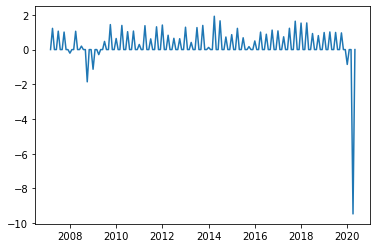

In [40]:
#gdp through time
train.groupby('date')['GDP'].apply(lambda x: x.pct_change()).to_numpy()
fig, ax = plt.subplots()

ax.plot(np.round(train.groupby('date')['GDP'].mean().pct_change(), decimals=5)*100)
#df['Change'] = df.groupby('Item', sort=False)['Values'].apply(
 #    lambda x: x.pct_change()).to_numpy()
#fig, ax = plt.subplots(1,2, figsize=(16,8))
#ax[0].plot(train.groupby('date')['GDP'].mean())
# churn rate through time
#ax[1].plot(train.groupby('date')['']
#train.merge(train.groupby('date')['real_interest_rate'].mean().diff().fillna(0), how='left', on='date')
#(train.merge(train.groupby('date')['UMCSENT'].mean().diff().pct_change().fillna(0), how='left', on='date'))
pd.DataFrame(train.groupby('date')['UMCSENT'].mean().diff().pct_change().fillna(0))
#train.groupby('date')['real_interest_rate'].mean().diff().fillna(0)
#train.groupby('date')['UMCSENT'].mean().diff().pct_change().fillna(0)

Text(0.5, 1.0, 'Churn rate')

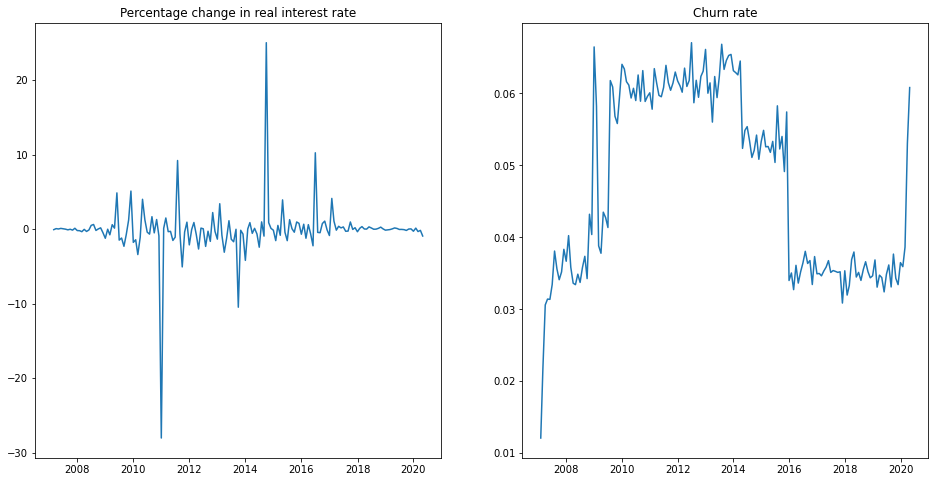

In [41]:
#real interest rate vs churn rate
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(np.round(train.groupby('date')['real_interest_rate'].mean().pct_change(), decimals=5))
ax[0].set_title('Percentage change in real interest rate')
ax[1].plot(train.groupby('date')['churn'].sum()/train.groupby('date')['churn'].count())
ax[1].set_title('Churn rate')

Text(0.5, 1.0, 'UMCSentiment over time')

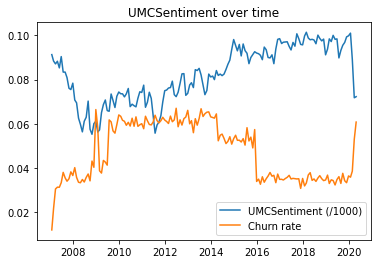

In [42]:
# umc sent through time
train['date']=pd.to_datetime(train['date'])
train['date']=train['date'].dt.date
fig, ax = plt.subplots()
ax.plot(train.groupby('date').UMCSENT.mean()/1000, label = 'UMCSentiment (/1000)')
ax.plot(train.groupby('date').churn.sum()/train.groupby('date').churn.count(), label='Churn rate')
ax.legend(loc='best')
ax.set_title('UMCSentiment over time')

# churn rate through time

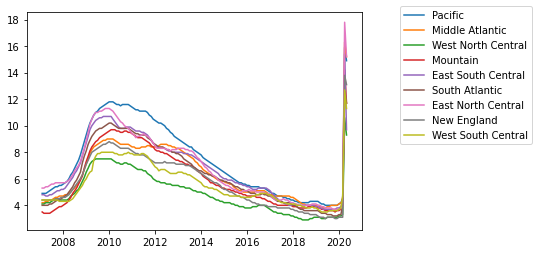

In [43]:
# unemployment rate by division through time
# churn rate by division through time
fig, ax = plt.subplots()
for div in train['Division'].unique():
    mask = train['Division']==div
    ax.plot(train[mask].groupby('date').unemployment_rate.mean(), label = div)
    ax.legend(bbox_to_anchor=(1.1, 1.05))

In [44]:
train['date'].apply(lambda x: x.year)

0          2007
1          2007
2          2007
3          2007
4          2007
           ... 
2111546    2020
2111547    2020
2111548    2020
2111549    2020
2111550    2020
Name: date, Length: 2111551, dtype: int64

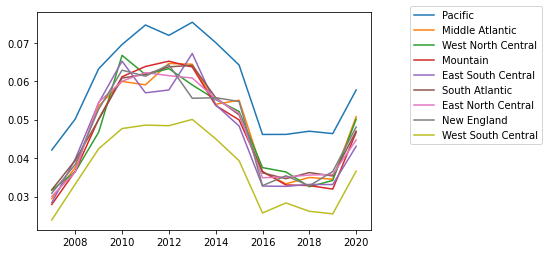

In [45]:
fig, ax = plt.subplots()
for div in train['Division'].unique():
    mask = train['Division']==div
    ax.plot(train[mask].groupby(train['date'].apply(lambda x: x.year)).churn.sum()/train[mask].groupby(train['date'].apply(lambda x: x.year)).churn.count(), label=div)
    ax.legend(bbox_to_anchor=(1.1, 1.05))

In [46]:
train.columns

Index(['index', 'date', 'customer_id', 'amount', 'deposit', 'withdrawal',
       'is_deposit', 'is_withdraw', 'dob', 'state', 'start_balance',
       'creation_date', 'creation_month', 'month_start', 'month_end', 'churn',
       'date_month_x', 'creation_date_month', 'months_w_bank', 'age',
       'amount_agg', 'is_depo_roll', 'is_wdraw_roll', 'State Code', 'Region',
       'Division', 'unemployment_rate', 'GDP', 'date_month_y',
       'real_interest_rate', 'DATE', 'UMCSENT', 'date_month'],
      dtype='object')